<h1 style = "text-align: center;"> 1. Análisis de regresión </h1>
El análisis de regresión es el campo de las matemáticas donde el objetivo es encontrar una función que se correlacione mejor con un conjunto de datos. Digamos que tenemos un conjunto de datos que contiene $ n $ puntos de datos;

<p style="text-align: center;">$ X = ( x^{(1)}, x^{(2)}, .., x^{(n)} ) $. </p>

Para cada uno de estos puntos de datos (de entrada) hay un valor $ y ^ {(i)} $ correspondiente (de salida).

Aquí, los puntos de datos $ x $ se denominan variables independientes y $ y $ la variable dependiente;
el valor de $ y ^ {(i)} $ depende del valor de $ x ^ {(i)} $, mientras que el valor de $ x ^ {(i)} $ puede elegirse libremente sin ninguna restricción impuesta por cualquier otra variable.

El objetivo del análisis de regresión es encontrar una función $ f (X) $ que pueda describir mejor la correlación entre $ X $ y $ Y $. En el campo del aprendizaje automático, esta función se denomina función de hipótesis y se denota como $ h _ {\theta} (x) $. Si podemos encontrar dicha función, podemos decir que hemos construido con éxito un modelo de regresión.

<br>

<img src="img/correlation_function.png">

Si los datos de entrada viven en un espacio 2D, esto se reduce a encontrar una curva que se ajuste a los puntos de datos. En el caso de 3D tenemos que encontrar un plano y en dimensiones superiores un hiperplano.

Para dar un ejemplo, digamos que estamos tratando de encontrar un modelo predictivo para el éxito de los estudiantes del curso de Saturday's AI. Tenemos un conjunto de datos $ Y $ que contiene la calificación final de $ n $ estudiantes. El conjunto de datos $ X $ contiene los valores de las variables independientes. Nuestra suposición inicial es que la calificación final solo depende del tiempo de estudio. La variable $ x ^ {(i)} $ por lo tanto indica cuántas horas ha estudiado el estudiante $ i $. Lo primero que haríamos es visualizar estos datos:

<img src="img/regression_left2-350x288.png">

Si los resultados se parecen a la figura de la izquierda, entonces no tenemos suerte. Parece que los puntos se distribuyen aleatoriamente y no existe ninguna correlación entre $ Y $ y $ X $. Sin embargo, si se parece a la figura de la derecha, probablemente haya una fuerte correlación y podamos empezar a buscar la función que describe esta correlación.

&nbsp;

Esta función podría ser, por ejemplo:
<p style="text-align: center;">$ h_{\theta}(X) =  \theta_0+ \theta_1 \cdot x $</p>
<p style="text-align: left;">o</p>
<p style="text-align: center;">$ h_{\theta}(X) = \theta_0 + \theta_1 \cdot x^2 $</p>
donde $ \theta $ son los parámetros dependientes de nuestro modelo.

<br><br><br>

<h2> 1.2 Regresión multivariante </h2>
<br>
Al evaluar los resultados de la sección anterior, podemos encontrar resultados insatisfactorios; la función no se correlaciona suficientemente con los puntos de datos. Nuestra suposición inicial probablemente no esté completa. No basta con tener en cuenta solo el tiempo de estudio.

La nota final no solo depende del tiempo de estudio, sino también de cuánto hayan dormido los alumnos la noche anterior al examen. Ahora el conjunto de datos contiene una variable adicional que representa el tiempo de sueño.

Nuestro conjunto de datos viene dado por $ X = ((x_1 ^ {(1)}, x_2 ^ {(1)}), (x_1 ^ {(2)}, x_2 ^ {(2)}), ..., ( x_1 ^ {(n)}, x_2 ^ {(n)})) $. En este conjunto de datos, $ x_1 ^ {(i)} $ indica cuántas horas ha estudiado el estudiante $ i $ y $ x_2 ^ {(i)} $ indica cuántas horas ha dormido.

<img src="img/regression_multi.png">

Este es un ejemplo de Regresión multivariante. La función debe incluir ambas variables. Por ejemplo:
<p style="text-align: center;">$ h_{\theta}(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2$</p>
or
<p style="text-align: center;">$ h_{\theta}(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2^3 $.</p>

<h2> 1.3 Regresión lineal vs. no lineal </h2>
<br>
Todos los ejemplos anteriores son ejemplos de regresión lineal. Hemos visto que en algunos casos $ y ^ {(i)} $ depende de una forma lineal de $ x ^ {(i)} $, pero también puede depender de alguna potencia de $ x ^ {(i)} $ , o en el registro o cualquier otra forma de $ x ^ {(i)} $. Sin embargo, en todos los casos su dependencia de los parámetros $ \theta $ fue lineal.

Entonces, lo que hace que la regresión lineal sea lineal no es que $ Y $ dependa de forma lineal de $ X $, sino que depende de forma lineal de $ \theta $.
$ Y $ debe ser lineal con respecto a los parámetros del modelo $ \theta $. Matemáticamente hablando, debe satisfacer el [principio de superposición](http://www.cut-the-knot.org/do_you_know/superposition.shtml).

Ejemplos de regresión no lineal serían:
<p style="text-align: center;">$ h_{\theta}(x) = \theta_0 + x_1^{\theta_1} $</p>
or
<p style="text-align: center;">$ h_{\theta}(x) = \theta_0 + \theta_1 / x_1 $</p>
<br>
La razón por la que se hace la distinción entre regresión lineal y no lineal es que los problemas de regresión no lineal son más difíciles de resolver y, por lo tanto, se necesitan más algoritmos computacionales intensivos.

Los modelos de regresión lineal se pueden escribir como un sistema lineal de ecuaciones, que se puede resolver encontrando la solución de forma cerrada $ \theta = (X ^ TX) ^ {- 1} X ^ TY $ con Álgebra lineal. 

Consulte <a href="http://www.stat.purdue.edu/~jennings/stat514/stat512notes/topic3.pdf" target="_blank"> estas </a> notas estadísticas para obtener más información sobre la resolución de modelos lineales con álgebra.

Como se discutió anteriormente, esta solución de forma cerrada solo se puede encontrar para problemas de regresión lineal. Sin embargo, incluso cuando el problema es de naturaleza lineal, debemos tener en cuenta que el cálculo de la inversa de una matriz de $ n $ por $ n $ tiene una complejidad de tiempo de $ O (n ^ 3) $. Esto significa que para conjuntos de datos grandes ($ n \gt 10.000 $) encontrar la solución de forma cerrada llevará más tiempo que resolverla iterativamente (método de descenso de gradiente) como se hace para problemas no lineales. Por lo tanto, generalmente se prefiere resolverlo de manera iterativa para conjuntos de datos más grandes, incluso si se trata de un problema lineal.

<h2> 1.4 Gradient Descend </h2>
<br>
El método Gradient Descent es una técnica de optimización general en la que intentamos encontrar el valor de los parámetros $ \theta $ con un enfoque iterativo.

Primero, construimos una <a href="https://en.wikipedia.org/wiki/Loss_function" target="_blank"> función de costo </a> (también conocida como función de pérdida o función de error) que da la diferencia entre los valores de la función de hipótesis $ h _ {\theta} (x) $ (los valores que espera que tenga $ Y $ con los valores actuales de $ \theta $) y los valores reales de $ Y $. Cuanto mejor sea su estimación de $ \theta $, mejor se acercarán los valores de $ h _ {\theta} (x) $ a los valores de $ Y $ y menor será la función de costo.

Por lo general, la función de costo se expresa como el error al cuadrado de la diferencia entre estas funciones:
<p style="text-align: center;">$ J(x) = \frac{1}{2n} \sum_i^n ( h_{\theta}(x^{(i)}) - y^{(i)} )^2 $</p>
<br>

En cada iteración elegimos nuevos valores para los parámetros $ \theta $, y nos movemos hacia los valores 'verdaderos' de estos parámetros, es decir, los valores que hacen que esta función de costo sea lo más pequeña posible. La dirección en la que tenemos que movernos es la dirección del gradiente negativo;

<p style="text-align: center;"> $ \Delta\theta = - \alpha \frac{d}{d\theta} J(x) $.</p>

La razón de esto es que el valor de una función disminuye más rápidamente si nos movemos hacia la dirección del gradiente negativo (la <a href="https://es.wikipedia.org/wiki/Derivada_direccional" target="_blank">  derivada direccional</a> es máximo en la dirección del gradiente).

Teniendo todo esto en cuenta, así es como funciona el descenso de gradientes:
<ul>
<li> Haga una suposición inicial pero inteligente de los valores de los parámetros $ \theta $. </li>
<li> Siga iterando mientras el valor de la función de costo no cumpla con sus criterios:
<ul>
<li> Con los valores actuales de $ \theta $, calcule el gradiente de la función de costo J ($ \Delta \theta = - \alpha \frac {d} {d \theta} J (x) $). </ li>
<li> Actualice los valores de los parámetros $ \theta: = \theta + \alpha \Delta \theta $ </li>
<li> Complete estos nuevos valores en la función de hipótesis y calcule nuevamente el valor de la función de costo; </li>
</ul>
</li>
</ul>

Tan importante como la estimación inicial de los parámetros es el valor que elija para la tasa de aprendizaje $ \alpha $. Esta tasa de aprendizaje determina qué tan rápido se mueve a lo largo de la pendiente del gradiente. Si el valor seleccionado de esta tasa de aprendizaje es demasiado pequeño, se necesitarán demasiadas iteraciones antes de alcanzar sus criterios de convergencia. Si este valor es demasiado grande, es posible que se sobrepase y no converja.

<h1 style = "text-align: center;"> 2. Implementación </h1>


In [17]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("students.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

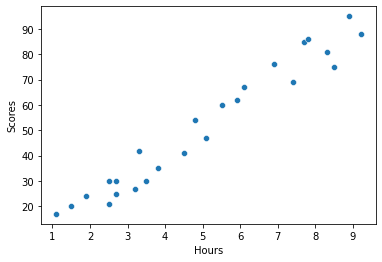

In [19]:
sns.scatterplot(x="Hours",y="Scores",data=df)

In [20]:
def predict(X,theta):
    return np.dot(X,theta)

In [21]:
def calculate_cost(X,theta,y):
    prediction = predict(X,theta)
    return ((prediction - y)**2).mean()/2

In [22]:
def scatter(X,theta,y):
    plt.xlabel('Hours')
    plt.ylabel('Score')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(X[:,1],y,'.')
    plt.plot(X[:,1],predict(X,theta), '-')
    plt.show()

In [23]:
#Este es el modelo que venía hecho. Me parece que por la forma que esta programado es dificil de entender.
def gradient_descent_linear_regression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    cost = []
    predictor = df["Hours"]
    X = np.column_stack((np.zeros(len(predictor)),predictor))
    y = df["Scores"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predict(X,theta)
        t0 = theta[0] - alpha *(pred - y).mean()
        t1 = theta[1] - alpha *((pred - y)* X[:,1]).mean()
        
        theta = np.array([t0,t1])
        cost = calculate_cost(X,theta,y)
        theta0.append(t0)
        theta1.append(t1)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {cost},theta = {theta}")
            abline(X,theta,y)
    print(f'theta0 = {np.mean(theta0)}\ntheta1 = {np.mean(theta1)}\nCosts = {np.mean(cost)}')

In [24]:
#Cosecha propia, mas limpio y eficiente
def gradiante(X,theta,y,alpha):
    prediction = predict(X,theta)
    for i in range(len(theta)):
        theta[i] = theta[i] - alpha * ((prediction - y) * X[:,i]).mean()
    return theta
        

def gradient_descent(alpha=0.047,iter=5000):
    theta = np.ones(2)
    X = np.column_stack((np.ones(len(df.Hours)),df.Hours))
    y = df.Scores
    cost = 0
    for i in range(iter):
        theta = gradiante(X,theta,y,alpha)
        cost = calculate_cost(X,theta,y)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {cost},theta = {theta}")
            scatter(X,theta,y)
    print(f'theta0 = {np.mean(theta[0])}\ntheta1 = {np.mean(theta[1])}\nCosts = {np.mean(cost)}')

Iteration: 1,Cost = 339.91028840248043,theta = [ 3.136996  14.2353316]


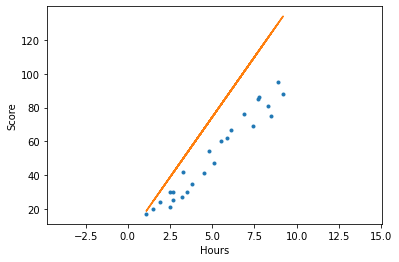

Iteration: 1001,Cost = 14.441365254628792,theta = [2.48366554 9.77580466]


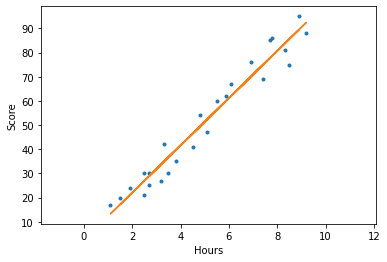

Iteration: 2001,Cost = 14.441365254622738,theta = [2.4836734  9.77580339]


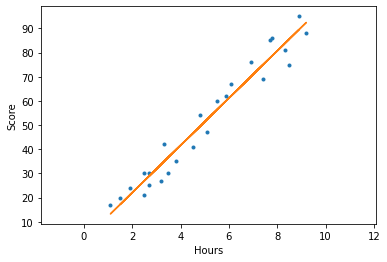

Iteration: 3001,Cost = 14.441365254622733,theta = [2.48367341 9.77580339]


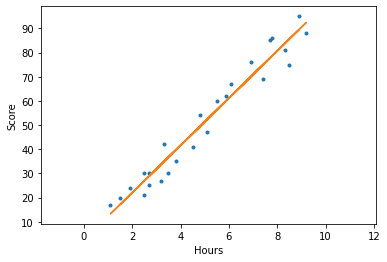

Iteration: 4001,Cost = 14.441365254622733,theta = [2.48367341 9.77580339]


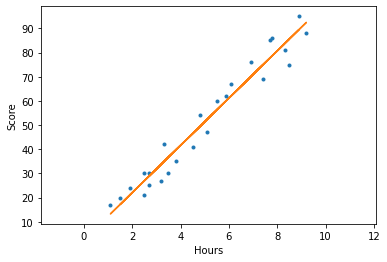

theta0 = 2.4836734053731604
theta1 = 9.775803390787477
Costs = 14.441365254622733


In [31]:
gradient_descent()

# Scikit-learn

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df[["Hours"]]
y = df["Scores"]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model
regr.fit(X, y)

In [ ]:
y_pred = regr.predict(X)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

In [ ]:
# Plot outputs
plt.scatter(X, y,  color='orange')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Score')

plt.show()